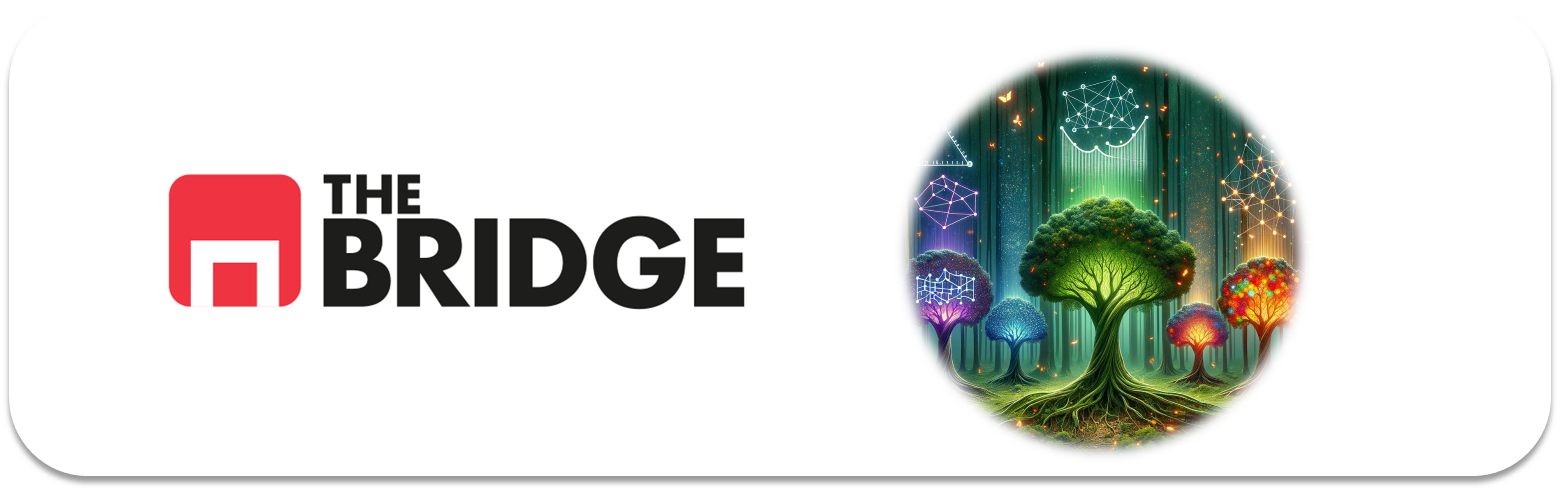

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
import seaborn as sns
import sklearn
#from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit,train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor



### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [4]:
df_bank = pd.read_csv("./data/bank-full.csv",sep=";")

In [5]:
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df_bank.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

   #5 - default: has credit in default? (binary: "yes","no") 
Common reasons for a credit default include:

Missed Payments: Regular payments, such as monthly installments, have not been made on time.

Non-Payment: The borrower has stopped making payments altogether.

Violation of Terms: The borrower has violated specific terms and conditions outlined in the loan agreement.

Bankruptcy: If the borrower declares bankruptcy, it can result in a default on outstanding debts.





Escojo la columna y como target

In [8]:
target='y'
features_cat=['default','job','housing','loan']
features_num=['balance']
X=  df_bank[features_cat+features_num]
y = df_bank[target]
#y = pd.DataFrame(y)
#X = df_bank.drop('poutcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
def encoderonehot (train_set:pd.DataFrame,features_cat:list):

    onehot = OneHotEncoder(sparse_output=False, drop='first') 
    data = onehot.fit_transform(train_set[features_cat])
    new_features = onehot.get_feature_names_out()
    train_set[new_features] = data
    train_set.drop(columns= features_cat, axis = 1, inplace = True)
    return train_set


In [10]:
X_train

,default,job,housing,loan,balance
3344,no,blue-collar,yes,no,849
17965,no,technician,yes,no,1415
18299,no,admin.,no,no,3842
10221,no,management,yes,no,-119
32192,no,blue-collar,no,no,3498
...,...,...,...,...,...
11284,no,housemaid,no,no,1059
44732,no,student,no,no,508
38158,no,technician,yes,no,1317
860,no,retired,no,no,165


In [11]:
X_test

,default,job,housing,loan,balance
3776,no,blue-collar,yes,no,580
9928,no,services,no,no,3644
33409,no,student,yes,no,538
31885,no,management,no,no,1773
15738,no,management,no,yes,217
...,...,...,...,...,...
13353,no,management,no,no,1890
38732,no,blue-collar,yes,no,217
5654,no,admin.,yes,no,0
3779,no,admin.,yes,yes,783


In [12]:
y_train

3344      no
17965     no
18299     no
10221     no
32192    yes
        ... 
11284    yes
44732     no
38158     no
860       no
15795     no
Name: y, Length: 36168, dtype: object

In [13]:
y_test

3776      no
9928      no
33409     no
31885     no
15738     no
        ... 
13353     no
38732    yes
5654      no
3779      no
11677     no
Name: y, Length: 9043, dtype: object

In [14]:
lr_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()

#convertir categóricas
X_train=encoderonehot(X_train,features_cat)
X_test=encoderonehot(X_test,features_cat)
#fin conversión



In [15]:
X_train

,balance,default_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,housing_yes,loan_yes
3344,849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17965,1415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18299,3842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10221,-119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32192,3498,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1059,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,1317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
860,165,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


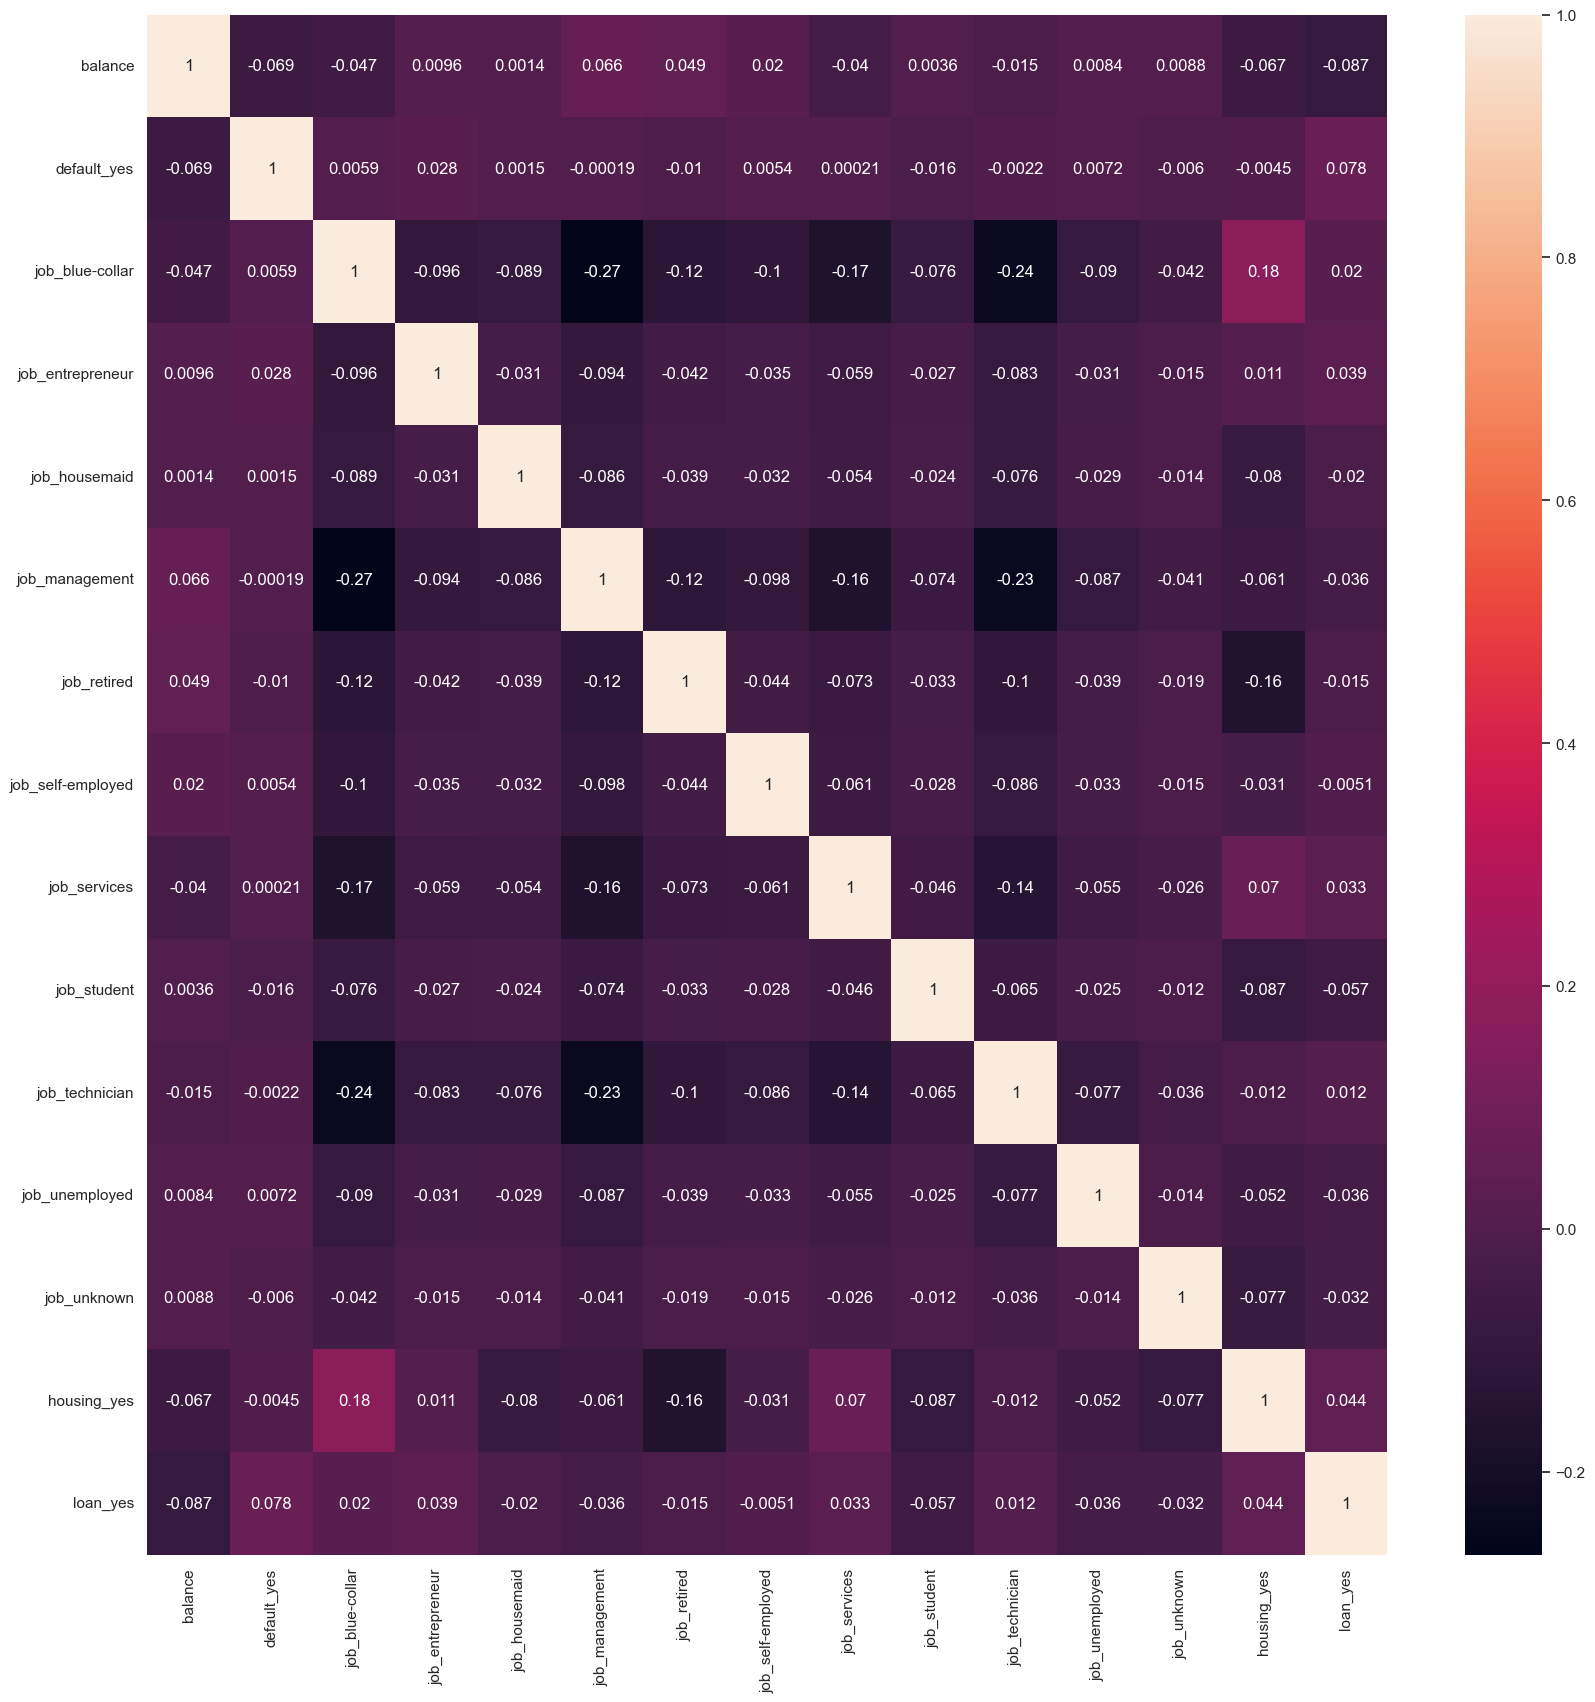

<Figure size 120000x120000 with 0 Axes>

In [16]:
sns.set (rc = {'figure.figsize':(20,20)})
sns.heatmap(X_train.corr(numeric_only=True),annot=True);
plt.figure(figsize=(100, 100), dpi=1200)
plt.show();

In [17]:
X_train.corr()

,balance,default_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,housing_yes,loan_yes
balance,1.000000,-0.068618,-0.047118,0.009628,0.001408,0.065742,0.049023,0.020455,-0.039595,0.003647,-0.014893,0.008367,0.008766,-0.067396,-0.086546
default_yes,-0.068618,1.000000,0.005894,0.027525,0.001547,-0.000195,-0.010254,0.005429,0.000207,-0.015671,-0.002238,0.007200,-0.006021,-0.004473,0.078079
job_blue-collar,-0.047118,0.005894,1.000000,-0.096260,-0.088556,-0.268335,-0.120587,-0.100732,-0.167615,-0.075925,-0.236204,-0.089506,-0.042244,0.176732,0.020035
job_entrepreneur,0.009628,0.027525,-0.096260,1.000000,-0.030972,-0.093850,-0.042175,-0.035231,-0.058623,-0.026555,-0.082612,-0.031304,-0.014775,0.011350,0.038514
job_housemaid,0.001408,0.001547,-0.088556,-0.030972,1.000000,-0.086338,-0.038800,-0.032411,-0.053931,-0.024429,-0.076000,-0.028799,-0.013592,-0.079970,-0.020450
job_management,0.065742,-0.000195,-0.268335,-0.093850,-0.086338,1.000000,-0.117568,-0.098209,-0.163417,-0.074024,-0.230289,-0.087265,-0.041186,-0.060721,-0.036335
job_retired,0.049023,-0.010254,-0.120587,-0.042175,-0.038800,-0.117568,1.000000,-0.044134,-0.073438,-0.033266,-0.103490,-0.039216,-0.018509,-0.155615,-0.014741
job_self-employed,0.020455,0.005429,-0.100732,-0.035231,-0.032411,-0.098209,-0.044134,1.000000,-0.061346,-0.027788,-0.086449,-0.032759,-0.015461,-0.030935,-0.005062
job_services,-0.039595,0.000207,-0.167615,-0.058623,-0.053931,-0.163417,-0.073438,-0.061346,1.000000,-0.046239,-0.143849,-0.054510,-0.025727,0.070271,0.032810
job_student,0.003647,-0.015671,-0.075925,-0.026555,-0.024429,-0.074024,-0.033266,-0.027788,-0.046239,1.000000,-0.065160,-0.024691,-0.011654,-0.086800,-0.057112


In [18]:
X_train.columns.tolist()

['balance',
 'default_yes',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'housing_yes',
 'loan_yes']

In [19]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns.tolist())
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns.tolist())

In [20]:
X_train

,balance,default_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,housing_yes,loan_yes
0,-0.169381,-0.138113,1.906137,-0.183485,-0.168800,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,0.892343,-0.438594
1,0.017848,-0.138113,-0.524621,-0.183485,-0.168800,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,2.221052,-0.170611,-0.080523,0.892343,-0.438594
2,0.820681,-0.138113,-0.524621,-0.183485,-0.168800,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594
3,-0.489588,-0.138113,-0.524621,-0.183485,-0.168800,1.955096,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,0.892343,-0.438594
4,0.706889,-0.138113,1.906137,-0.183485,-0.168800,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-0.099915,-0.138113,-0.524621,-0.183485,5.924172,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594
36164,-0.282181,-0.138113,-0.524621,-0.183485,-0.168800,-0.511484,-0.229856,-0.192008,-0.319497,6.909699,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594
36165,-0.014570,-0.138113,-0.524621,-0.183485,-0.168800,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,2.221052,-0.170611,-0.080523,0.892343,-0.438594
36166,-0.395643,-0.138113,-0.524621,-0.183485,-0.168800,-0.511484,4.350549,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594


In [21]:
X_test

,balance,default_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,housing_yes,loan_yes
0,-0.258364,-0.138113,1.906137,-0.183485,-0.1688,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,0.892343,-0.438594
1,0.755184,-0.138113,-0.524621,-0.183485,-0.1688,-0.511484,-0.229856,-0.192008,3.129923,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594
2,-0.272258,-0.138113,-0.524621,-0.183485,-0.1688,-0.511484,-0.229856,-0.192008,-0.319497,6.909699,-0.450237,-0.170611,-0.080523,0.892343,-0.438594
3,0.136271,-0.138113,-0.524621,-0.183485,-0.1688,1.955096,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594
4,-0.378442,-0.138113,-0.524621,-0.183485,-0.1688,1.955096,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,2.280013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,0.174974,-0.138113,-0.524621,-0.183485,-0.1688,1.955096,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,-1.120646,-0.438594
9039,-0.378442,-0.138113,1.906137,-0.183485,-0.1688,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,0.892343,-0.438594
9040,-0.450224,-0.138113,-0.524621,-0.183485,-0.1688,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,0.892343,-0.438594
9041,-0.191213,-0.138113,-0.524621,-0.183485,-0.1688,-0.511484,-0.229856,-0.192008,-0.319497,-0.144724,-0.450237,-0.170611,-0.080523,0.892343,2.280013


<Axes: >

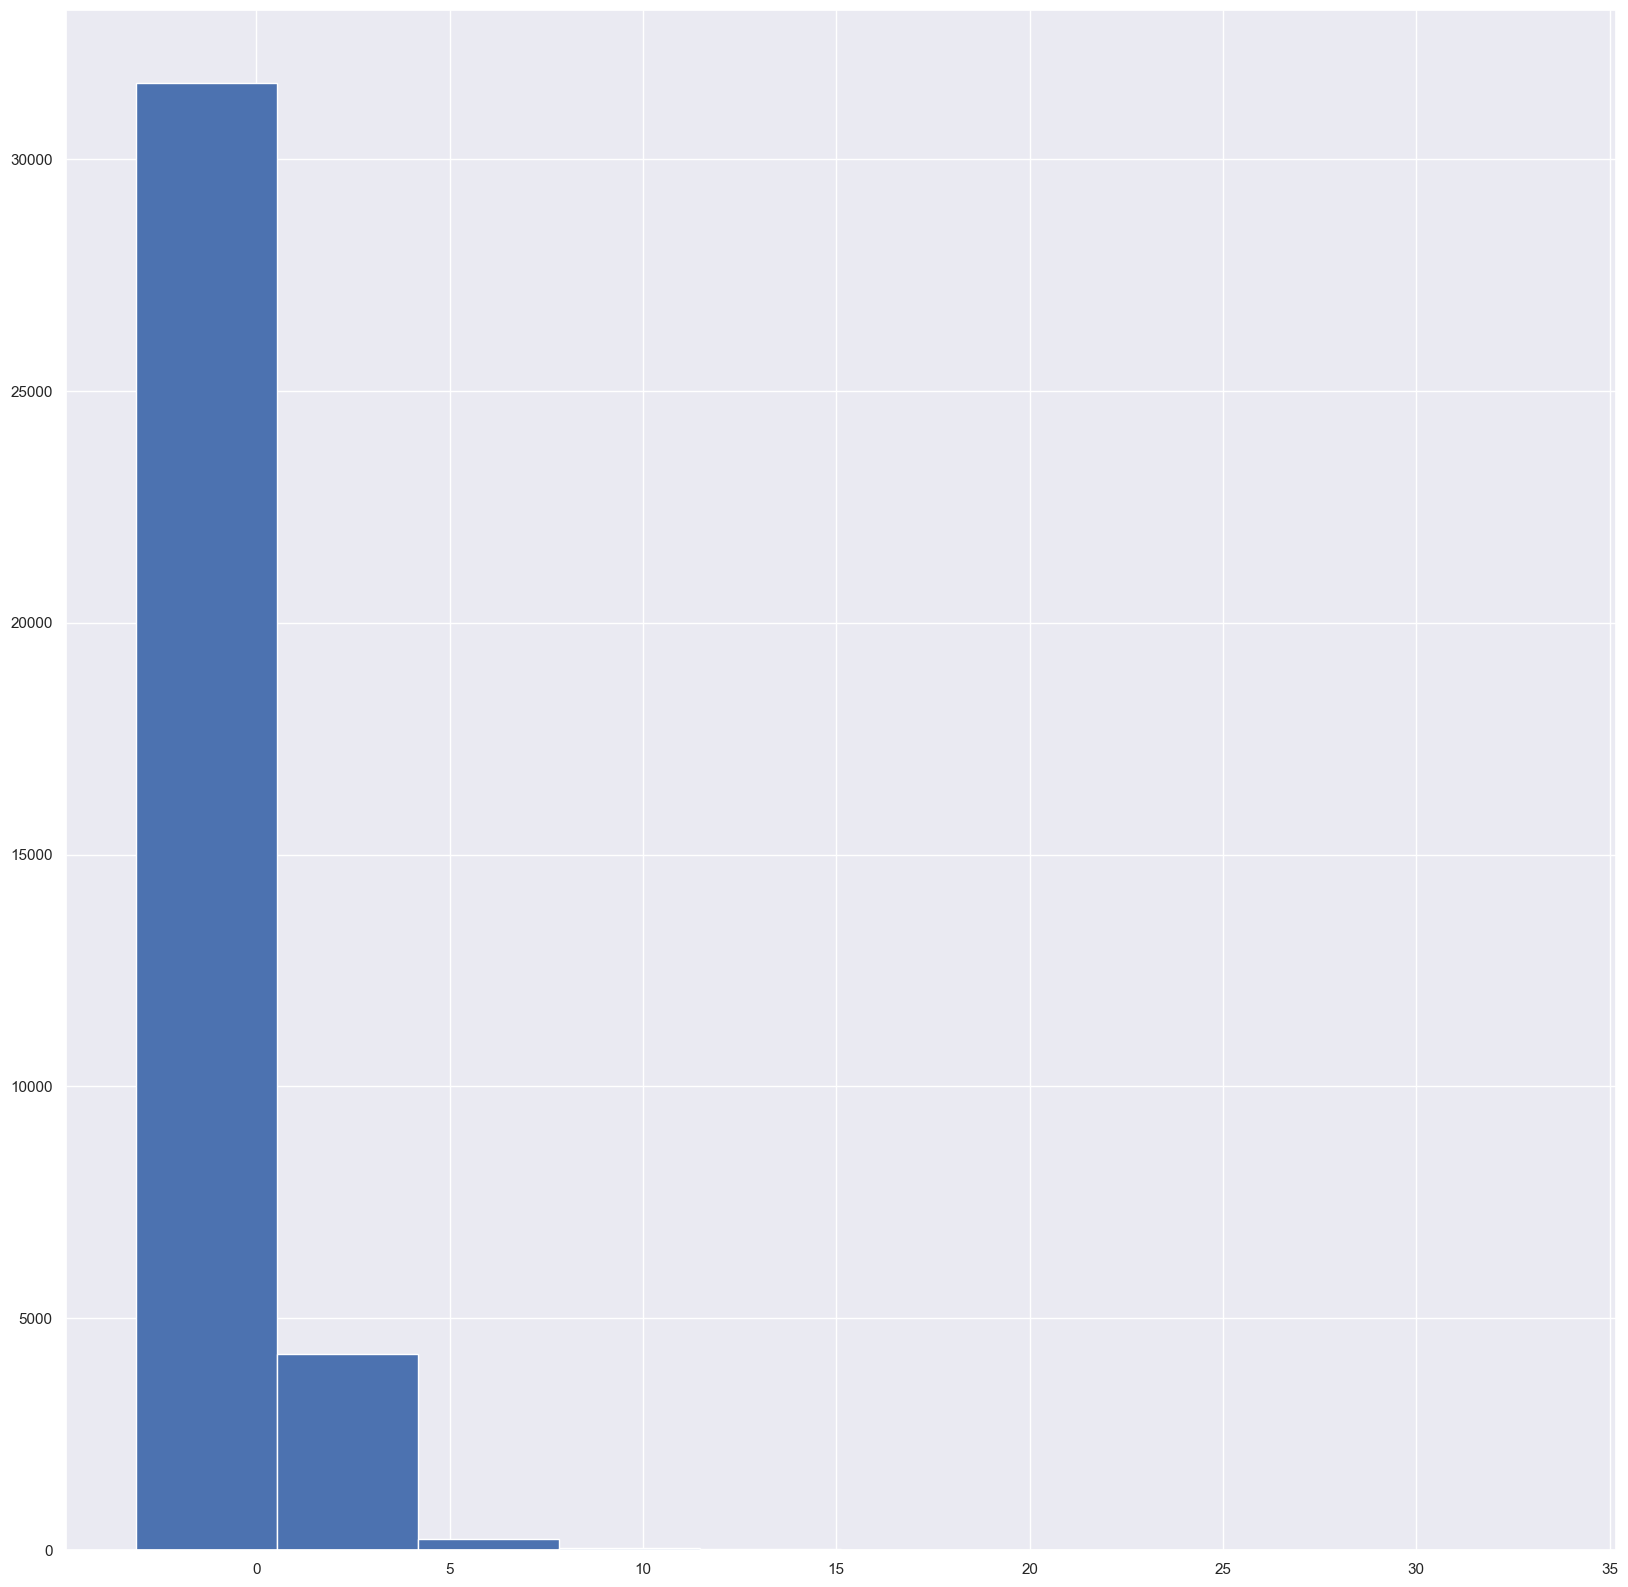

In [22]:
X_train.balance.hist()

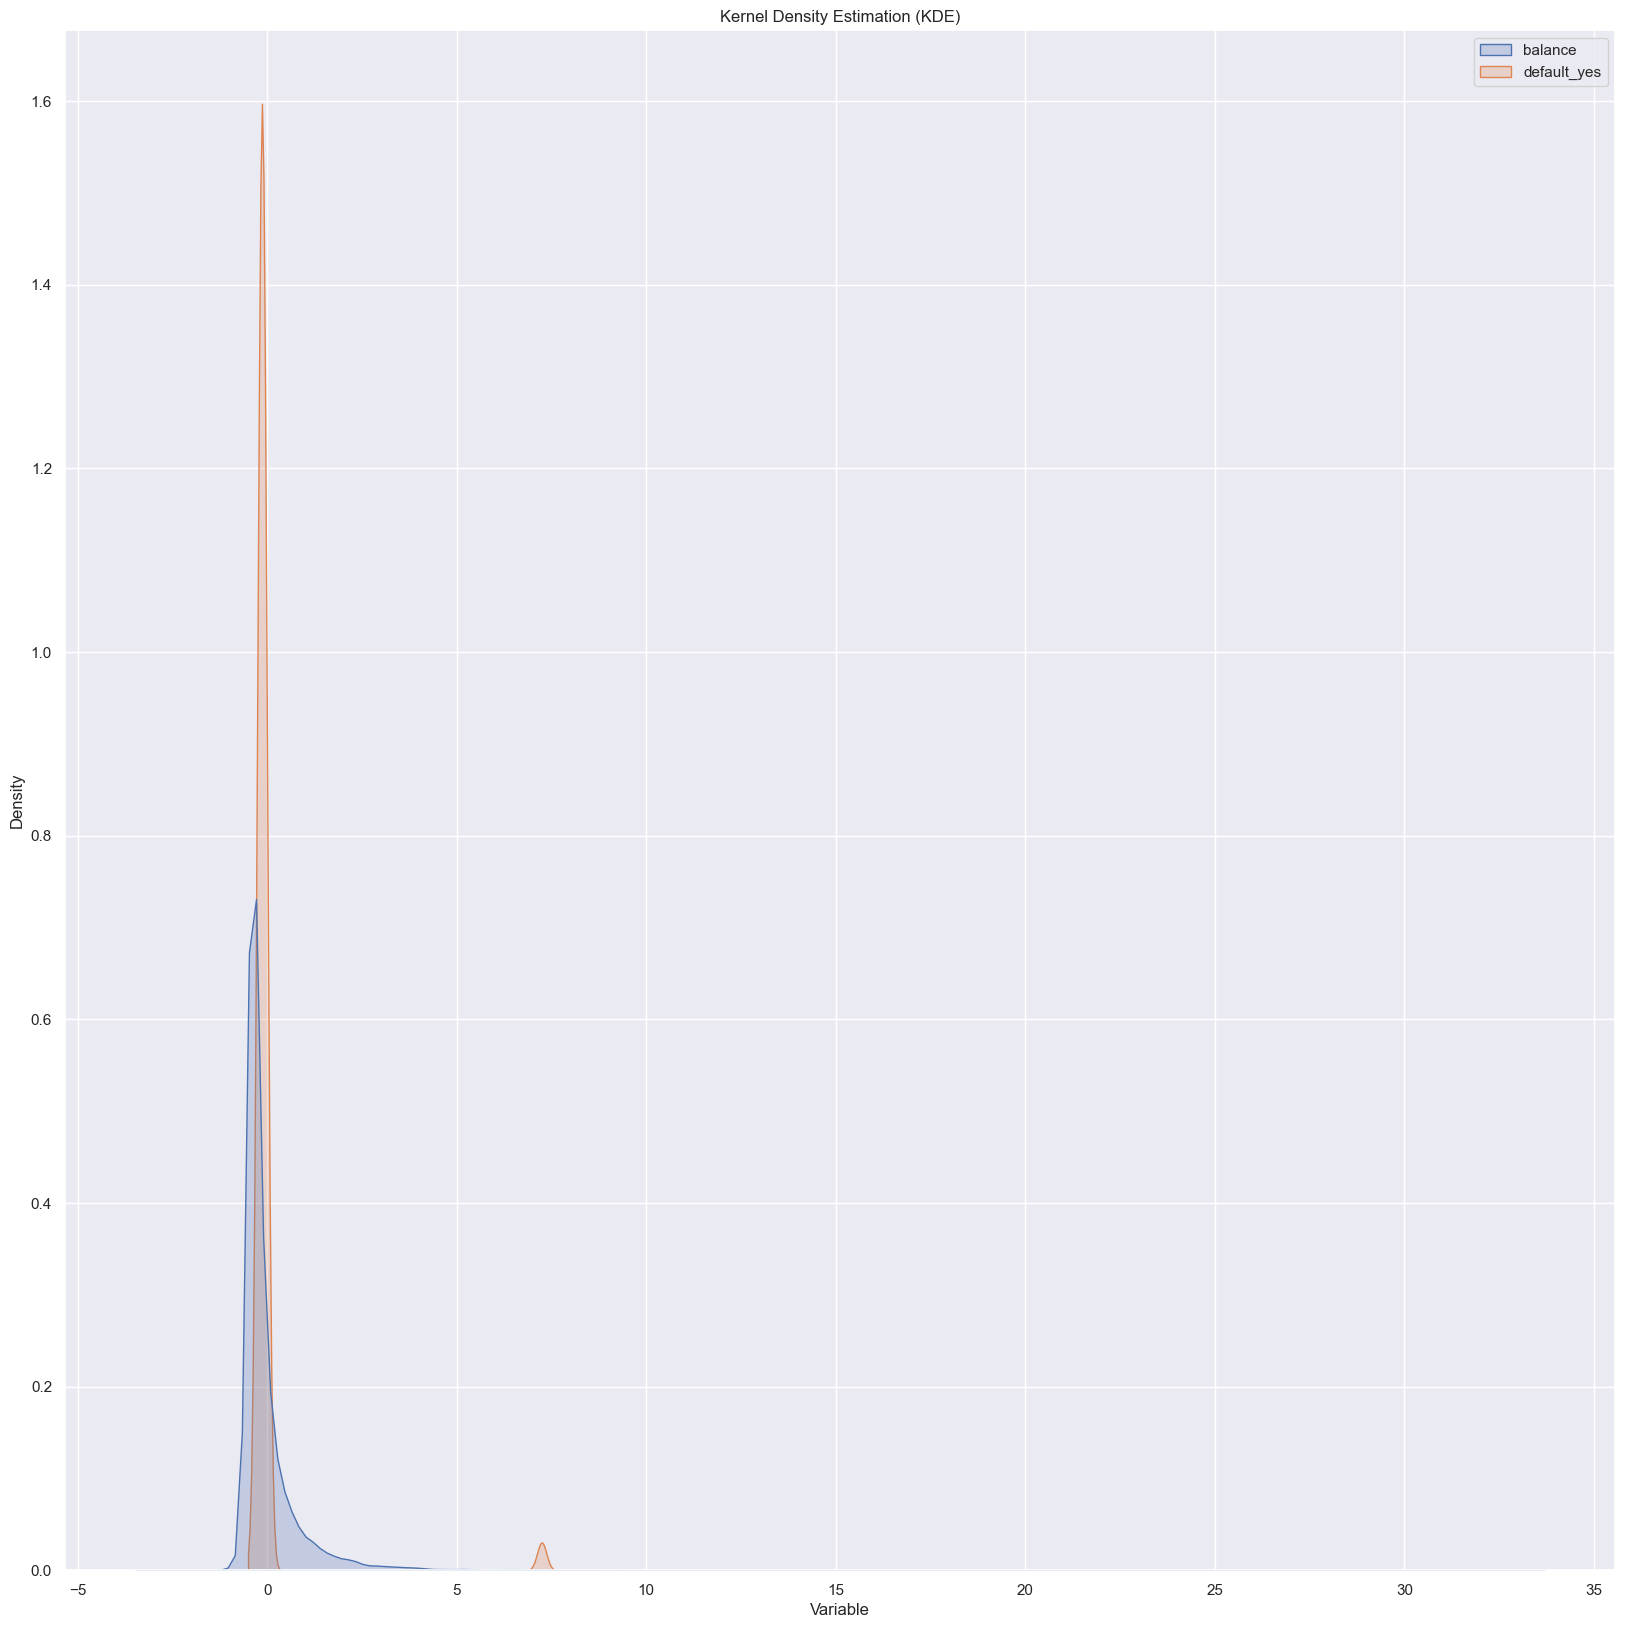

In [23]:
sns.kdeplot(X_train[["balance","default_yes"]], fill=True)

# Add labels and title
plt.xlabel('Variable')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE)')

# Show the plot
plt.show()

In [24]:
lr_clf.fit(X_train, y_train)


LogisticRegression()

In [25]:
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [26]:

lr_pred = lr_clf.predict(X_test)
tree_pred = tree_clf.predict(X_test)

In [27]:
print("Para Regresión Logística")
print(classification_report(y_test, lr_pred))

Para Regresión Logística
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7952
         yes       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



In [28]:
print("Para Árbol de decisión")
print(classification_report(y_test, tree_pred))

Para Árbol de decisión
              precision    recall  f1-score   support

          no       0.90      0.93      0.91      7952
         yes       0.34      0.27      0.30      1091

    accuracy                           0.85      9043
   macro avg       0.62      0.60      0.61      9043
weighted avg       0.83      0.85      0.84      9043



In [29]:
tree_param_grid = {
    'max_depth': [None] + list(range(1, 11)),
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [2,4,8]
}

# RandomizedSearch para DecisionTreeClassifier
tree_random_search = RandomizedSearchCV(tree_clf, tree_param_grid, n_iter=25, cv=5, scoring='accuracy', random_state=42)
tree_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8]},
                   random_state=42, scoring='accuracy')

In [30]:
tree_random_search.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 4}

In [31]:
tree_random_search.best_score_

0.8839305503937597

In [32]:
# GridSearchCV para DecisionTreeClassifier

tree_grid_search = GridSearchCV(tree_clf, tree_param_grid, cv=5, scoring='accuracy')
tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='accuracy')

In [33]:
y_pred = tree_grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7952
         yes       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

El arbol de decisión parece tener mejores métricas que la Regresión Logística, la calidad del modelo es muy baja
Pruebo con MinMaxScaler()

In [34]:
target='y'
features_cat=['default','job','housing','loan']
features_num=['balance']
X=  df_bank[features_cat+features_num]
y = df_bank[target]
#y = pd.DataFrame(y)
#X = df_bank.drop('poutcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
lr_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()

#convertir categóricas
X_train=encoderonehot(X_train,features_cat)
X_test=encoderonehot(X_test,features_cat)
#fin conversión
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns.tolist())
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns.tolist())

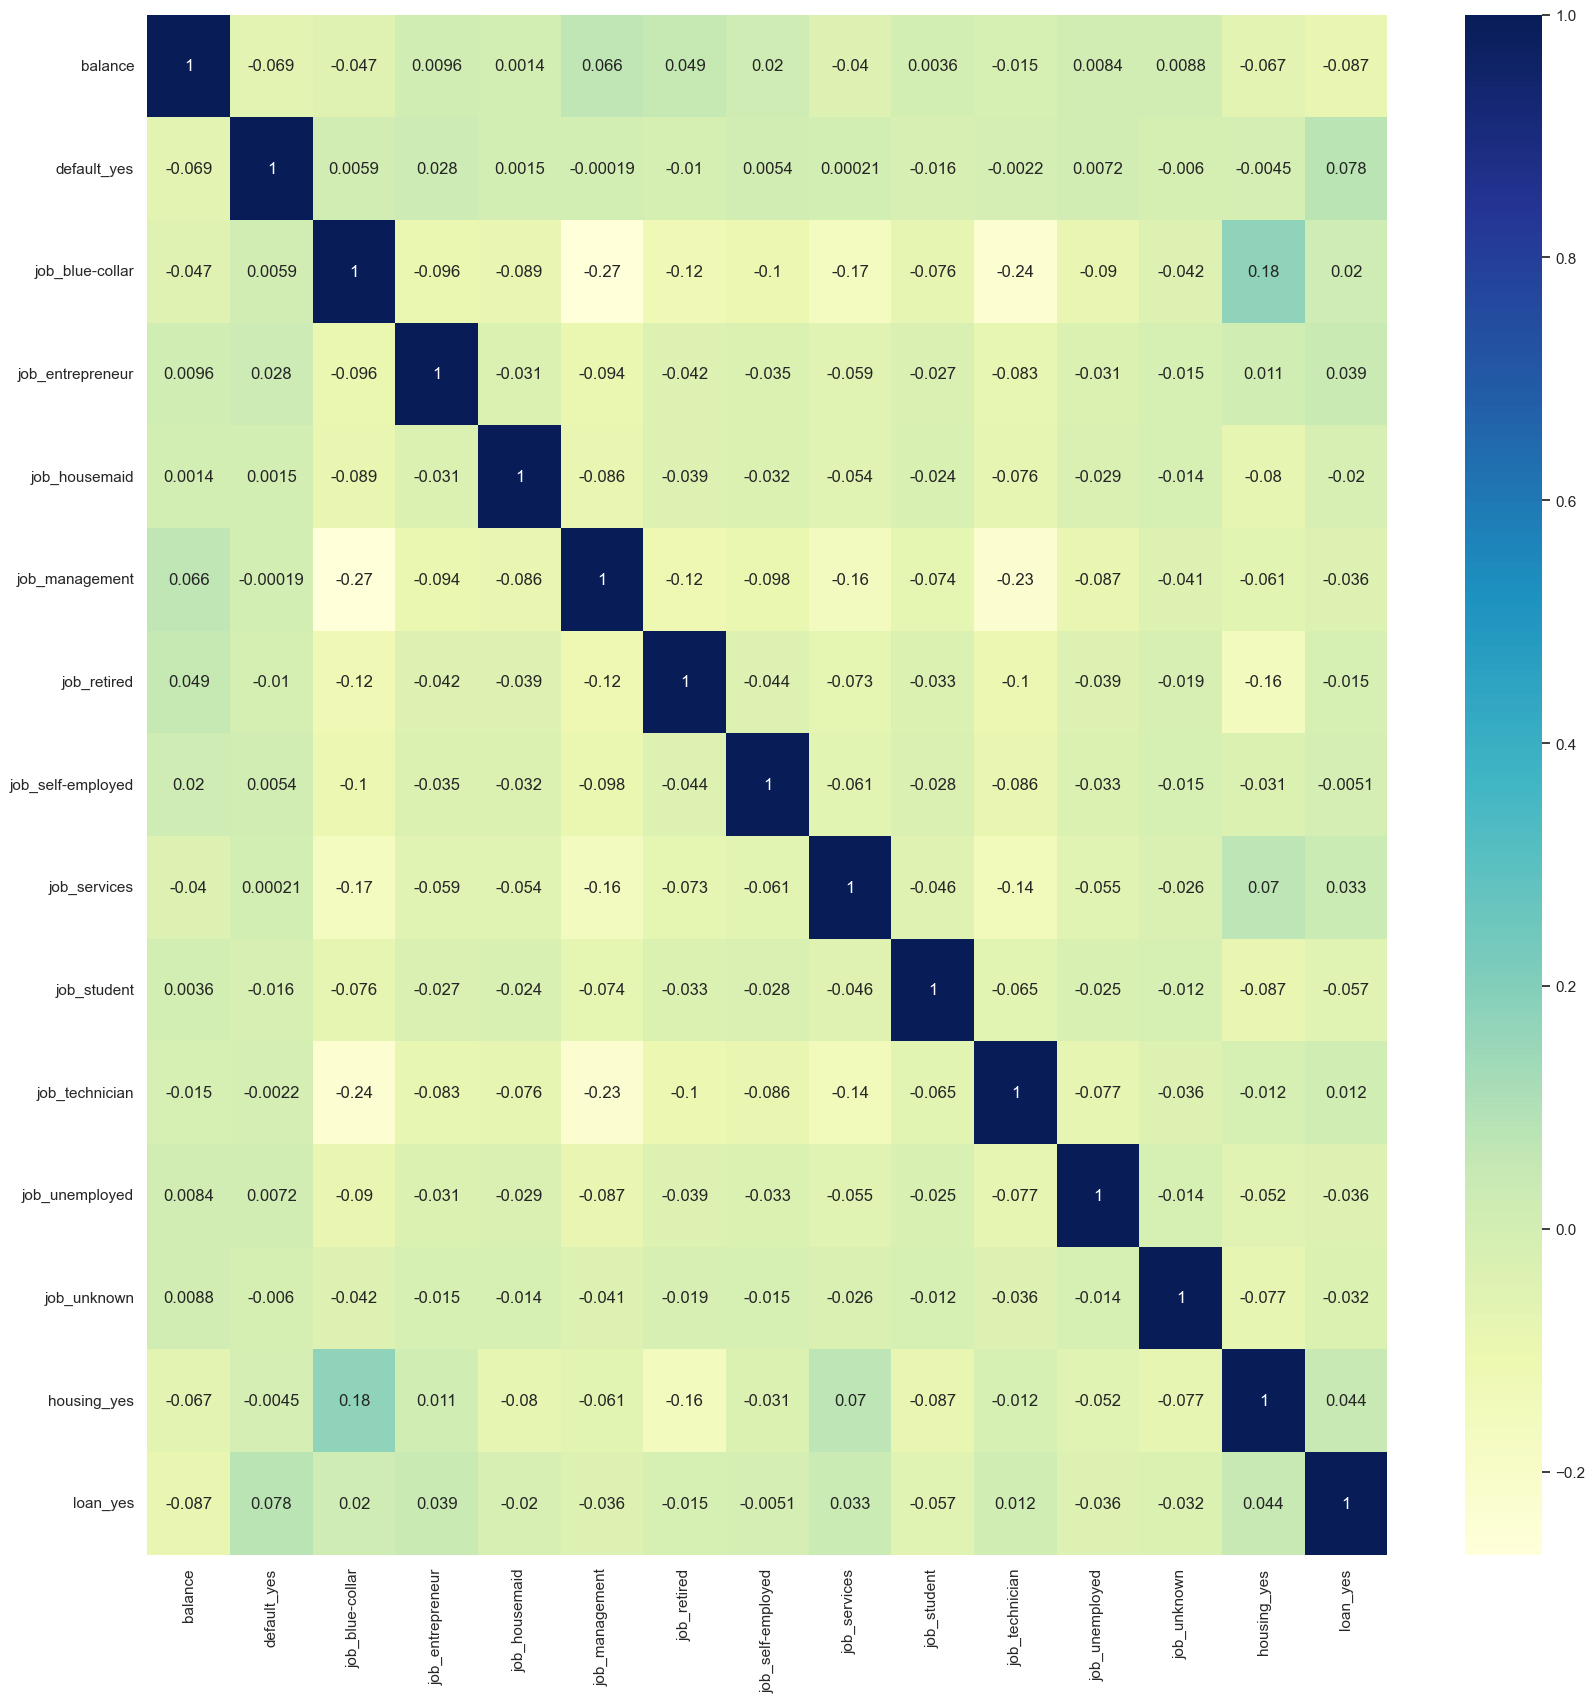

In [35]:
sns.set (rc = {'figure.figsize':(20,20)})
sns.heatmap(X_train.corr(),cmap="YlGnBu",annot=True);
plt.show();

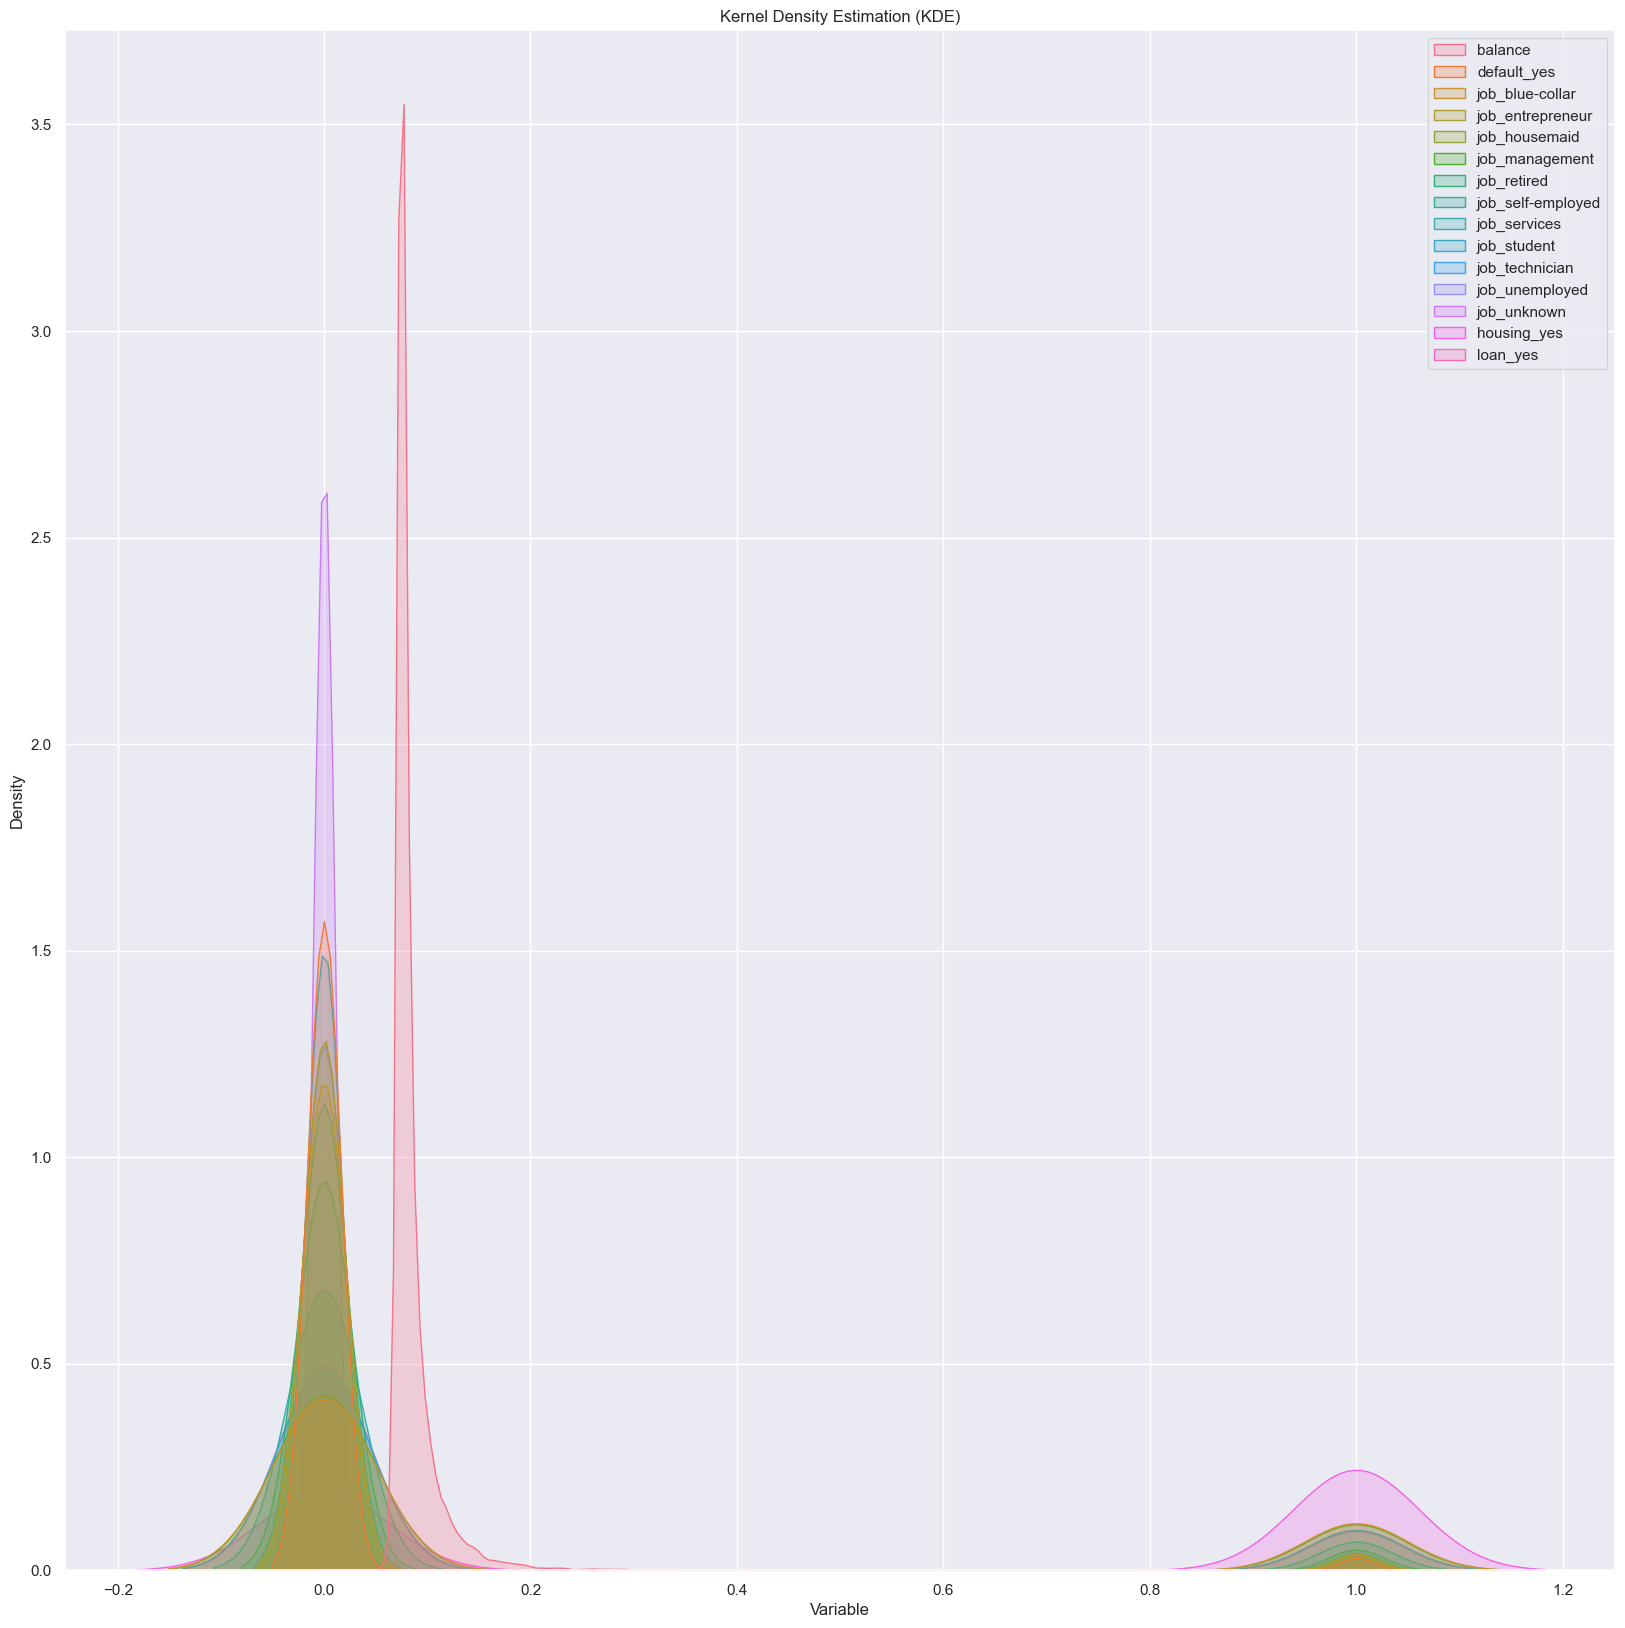

In [36]:
sns.kdeplot(X_train, fill=True)

# Add labels and title
plt.xlabel('Variable')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE)')

# Show the plot
plt.show()

In [37]:
lr_clf.fit(X_train, y_train)


LogisticRegression()

In [38]:
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [39]:

lr_pred = lr_clf.predict(X_test)
tree_pred = tree_clf.predict(X_test)

In [40]:
print("Para Regresión Logística")
print(classification_report(y_test, lr_pred))

Para Regresión Logística
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7952
         yes       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



In [41]:
print("Para Árbol de decisión")
print(classification_report(y_test, tree_pred))

Para Árbol de decisión
              precision    recall  f1-score   support

          no       0.90      0.93      0.91      7952
         yes       0.34      0.27      0.30      1091

    accuracy                           0.85      9043
   macro avg       0.62      0.60      0.61      9043
weighted avg       0.83      0.85      0.84      9043



In [42]:
tree_param_grid = {
    'max_depth': [None] + list(range(1, 11)),
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [2,4,8]
}
# RandomizedSearch para DecisionTreeClassifier
tree_random_search = RandomizedSearchCV(tree_clf, tree_param_grid, n_iter=25, cv=5, scoring='accuracy', random_state=42)
tree_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8]},
                   random_state=42, scoring='accuracy')

In [43]:
# GridSearchCV para DecisionTreeClassifier

tree_grid_search = GridSearchCV(tree_clf, tree_param_grid, cv=5, scoring='accuracy')
tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='accuracy')

In [44]:
y_pred = tree_grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7952
         yes       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,